# Useful Links

https://selectfrom.dev/10-sql-queriesyou-should-know-as-a-data-scientist-8bf616204765

# GroupBy

https://learnsql.com/blog/group-by-sql-interview-questions/

select e2.manager_id, count(e1.employee_id) as "No of Reportees"  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id order by e2.manager_id;


select *  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id order by e2.manager_id;

select avg(e.salary), sum(e.salary), d.department_name, count(e.employee_id) from employees e join departments d ON e.department_id=d.department_id
group by d.department_name order by avg(e.salary) desc;

# Count

https://learnsql.com/blog/difference-between-count-distinct/

|Scenario|Description|
|-|-|
|count(*) |counts the total rows in the table, including the NULL values|
|COUNT(-13) or COUNT(1)|counts the total rows in the table, including the NULL values|
|count(column_name)|count all the rows in the specified column while **excluding NULL values**, will include duplicate values when counting|
|COUNT (DISTINCT column_name)| count only distinct (unique) rows in the defined column.|
|COUNT(CASE WHEN order_price > 1000 THEN 1 END)|1. Find all the values in the column order_price above 1 000.<br/>2. Assign the value 1 (you can assign any value you want) to these values.<br/> 3. Assign NULL to rows with prices below 1 000.<br/> 4. Count the number of assigned 1s.<br/> 5. Show the result in the column significant_orders.|

# Date

select date_part('year', hire_date) as year, date_part('month', hire_date) as month, date_part('day',hire_date) as day,
date_part('dow',hire_date) as dayofweek,
to_char(hire_date, 'Dy') as day_name,
to_char(hire_date,'Month') as month_name from employees;

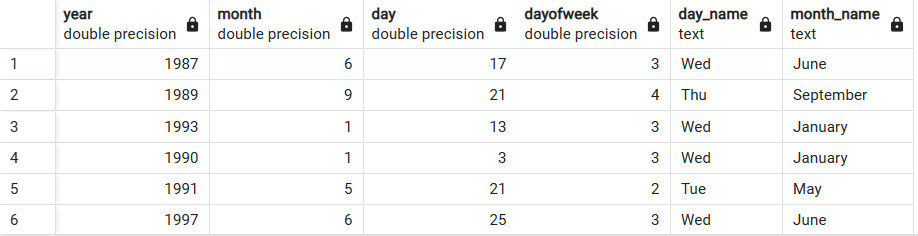

# CASE WHEN


select employee_id, first_name, salary, (select round(avg(salary)) from employees) as average_salary,
(CASE WHEN salary > (select avg(salary) from employees) THEN 'higher_than_average' ELSE 'lower_than_average' END) as salary_case
from employees;

# Correlated Subqueries

A correlated subquery is one way of reading every row in a table and comparing values in each row against related data. It is used whenever a subquery must return a different result or set of results for each candidate row considered by the main query.

Example: Write a query that finds the first name, salary, department, and average salary by department.

**select employee_id, first_name, salary, d.department_id, d.department_name,
(select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id) as department_average from employees e1 
join departments d on e1.department_id=d.department_id 
where salary < (select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id);**

# Window Functions
Window functions apply **aggregate and ranking functions over a particular window (set of rows). OVER clause is used with window functions to define that window. OVER clause does two things:**

- Partitions rows to form set of rows (PARTITION BY clause is used).
- Orders rows within those partitions into a particular order (ORDER BY clause is used).

Various aggregate functions such as SUM(), COUNT(), AVERAGE(), MAX(), and MIN() applied over a particular window (set of rows) are called aggregate window functions.

## Aggregation by Partitions

The following query will give you the average salary for each department.

**select first_name, salary, ROUND(AVG(salary) OVER(PARTITION BY e1.department_id)) as avg_salary_by_dept,
e1.department_id, d.department_name, ROW_NUMBER() OVER(PARTITION BY d.department_id ORDER BY salary DESC) AS "Row Number"
FROM employees e1 join departments d on e1.department_id=d.department_id  
order by salary DESC;**

## Ranking the Values

The Rank() function is a window function that assigns a rank to each row within a partition of a result set.

The following example orders the table by the salary (descending). A rank value of 1 is the highest salary value.

**select first_name, salary, RANK() OVER (ORDER BY salary desc) FROM employees;**

# Group vs Partition

|Group By|SQL PARTITION BY|
|-|-|
|We get a limited number of records using the Group By clause|We get all records in a table using the PARTITION BY clause.|
|It gives one row per group in result set. For example, we get a result for each group of CustomerCity in the GROUP BY clause.|It gives aggregated columns with each record in the specified table.<br/><br/>We have 15 records in the Orders table. In the query output of SQL PARTITION BY, we also get 15 rows along with Min, Max and average values.|


# Date

select hire_date, age(CURRENT_DATE, hire_date),
   date_part('year',age(CURRENT_DATE, hire_date)),
   date_part('month',age(CURRENT_DATE, hire_date)),
   date_part('day',age(CURRENT_DATE, hire_date))
   from employees;

## Date Between

select * from employees where hire_date BETWEEN '01-01-1970' AND '01-01-1992';

# Sample Queries

select e2.manager_id, count(e1.employee_id) as "No of Reportees"  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id group by e2.manager_id order by e2.manager_id;


select *  from employees e1 join employees e2 
on e1.employee_id=e2.manager_id order by e2.manager_id;

select round(avg(e.salary)), sum(e.salary), d.department_name, count(e.employee_id) from employees e join departments d ON e.department_id=d.department_id
group by d.department_name order by avg(e.salary) desc;

select count(*) from employees;

select count(manager_id) from employees;

select max(e.salary), e.employee_id, e.first_name from employees e group by e.employee_id order by e.salary desc LIMIT 1;

select employee_id, first_name, salary from employees
where salary IN(select max(salary) from employees e  group by e.employee_id order by e.salary);

select first_name, CASE WHEN salary > 4500 THEN 'HIGH SALARY' ELSE NULL END as high_salary from employees;

select date_part('year', hire_date) as year, date_part('month', hire_date) as month, date_part('day',hire_date) as day,
date_part('dow',hire_date) as dayofweek,
to_char(hire_date, 'Dy') as day_name,
to_char(hire_date,'Month') as month_name from employees;

select employee_id, first_name, salary, (select round(avg(salary)) from employees) as average_salary,
(CASE WHEN salary > (select avg(salary) from employees) THEN 'higher_than_average' ELSE 'lower_than_average' END) as salary_case
from employees;


select employee_id, first_name, salary, d.department_id, d.department_name,
(select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id) as department_average from employees e1 
join departments d on e1.department_id=d.department_id 
where salary < (select round(avg(salary)) from employees e2 where e1.department_id= e2.department_id);

select first_name, salary, ROUND(AVG(salary) OVER(PARTITION BY e1.department_id)) as avg_salary_by_dept,
e1.department_id, d.department_name, ROW_NUMBER() OVER(PARTITION BY d.department_id ORDER BY salary DESC) AS "Row Number",
DATEDIFF(year, e1.hire_date, GETDATE()) AS "Experience"
FROM employees e1 join departments d on e1.department_id=d.department_id  
order by salary DESC;

select first_name, salary, RANK() OVER (ORDER BY salary desc) FROM employees;


select hire_date, age(CURRENT_DATE, hire_date),
   date_part('year',age(CURRENT_DATE, hire_date)),
   date_part('month',age(CURRENT_DATE, hire_date)),
   date_part('day',age(CURRENT_DATE, hire_date))
   from employees;





# Like

select * from employees where first_name like '%h';

# Queries

find duplicate rows in a database? and then write SQL query to delete them?
